In [1]:
%matplotlib inline


# Compare cross decomposition methods


Simple usage of various cross decomposition algorithms:
- PLSCanonical
- PLSRegression, with multivariate response, a.k.a. PLS2
- PLSRegression, with univariate response, a.k.a. PLS1
- CCA

Given 2 multivariate covarying two-dimensional datasets, X, and Y,
PLS extracts the 'directions of covariance', i.e. the components of each
datasets that explain the most shared variance between both datasets.
This is apparent on the **scatterplot matrix** display: components 1 in
dataset X and dataset Y are maximally correlated (points lie around the
first diagonal). This is also true for components 2 in both dataset,
however, the correlation across datasets for different components is
weak: the point cloud is very spherical.


In [21]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_decomposition import PLSCanonical, PLSRegression, CCA

# #############################################################################
# Dataset based latent variables model

n = 500
# 2 latents vars:
l1 = np.random.normal(size=n)
l2 = np.random.normal(size=n)


latents = np.array([l1, l1, l2, l2]).T
X = latents + np.random.normal(size=4 * n).reshape((n, 4))
Y = latents + np.random.normal(size=4 * n).reshape((n, 4))

X_train = X[:n // 2]
Y_train = Y[:n // 2]
X_test = X[n // 2:]
Y_test = Y[n // 2:]

print("Corr(X)")
print(np.round(np.corrcoef(X.T), 2))
print("Corr(Y)")
print(np.round(np.corrcoef(Y.T), 2))

Automatically created module for IPython interactive environment
Corr(X)
[[ 1.    0.47 -0.07  0.01]
 [ 0.47  1.   -0.04  0.01]
 [-0.07 -0.04  1.    0.5 ]
 [ 0.01  0.01  0.5   1.  ]]
Corr(Y)
[[ 1.    0.52 -0.07 -0.09]
 [ 0.52  1.   -0.08 -0.06]
 [-0.07 -0.08  1.    0.48]
 [-0.09 -0.06  0.48  1.  ]]


In [220]:
x = np.array([[1], [2], [3], [4]])
x = np.array([[1, 2]])
if len(x.shape) == 1:
    x = x[:,np.newaxis]
if x.shape[0] == 1:
    x = x.T
print(x.shape)
#_spatial.distance.pdist(x, metric='euclidean')

#x = np.array([(1, 0), (2, 0), (3, 0), (4, 0)])
#_spatial.distance.pdist(x, metric='minkowski')

(2, 1)


In [242]:
from scipy.spatial.distance import directed_hausdorff


u = np.array([(1.0, 1.0),
              (2.0, 1.0),
              (4.0, 3.0),
              (8.0, 4.0)])
v = np.array([(1.0, 0.0),
              (2.0, 1.0),
              (4.0, 2.0),
              (-8., 3.0)])
u = np.array([(1.0, 0.0),
              (0.0, 1.0),
              (-1.0, 0.0),
              (0.0, -1.0)])
v = np.array([(2.0, 0.0),
              (0.0, 2.0),
              (-2.0, 0.0),
              (0.0, -4.0)])


from sklearn.datasets import make_circles
u, _ = make_circles(n_samples=100, noise=0.05)
v, _ = make_circles(n_samples=100, noise=0.05)

#u = np.array([(1.0, 0.0),
#              (2.0, 0.0),
#              (3.0, 0.0),
#              (4.0, 0.0)])
#v = np.array([(1.0, 0.0),
#              (2.0, 0.0),
#              (3.0, 0.0),
#              (-2., 0.0)])


#u = np.array([(1.0, 1.0),
#              (4.0, 1.0),
#              (2.0, 3.0),
#              (4.0, 4.0)])
#v = np.array([[1, 2, 3, 4]])

#ax(directed_hausdorff(u, v)[0], directed_hausdorff(v, u)[0])


# caulculate distance matrix
from scipy.spatial import distance_matrix
import numpy as np
if False:
    u_dist = distance_matrix(u,u, 2)
    v_dist = distance_matrix(v,v, 2)
    indx = np.tril_indices(u.shape[0])
    v_dist[indx] = np.inf
    u_dist[indx] = np.inf
    # get the smalles and second smallest
    def get_min_dist(dist_mat):
        _dist_mat = dist_mat.copy()
        idx_1st_min = np.unravel_index(np.argmin(_dist_mat, axis=None), _dist_mat.shape)
        val_1st_min = _dist_mat[idx_1st_min]
        _dist_mat[idx_1st_min] = np.inf
        idx_2nd_min = np.unravel_index(np.argmin(_dist_mat, axis=None), _dist_mat.shape)
        val_2nd_min = _dist_mat[idx_2nd_min]
        return idx_1st_min, val_1st_min, idx_2nd_min, val_2nd_min
    v_idx_1st_min, v_val_1st_min, v_idx_2nd_min, v_val_2nd_min = get_min_dist(v_dist)
    u_idx_1st_min, u_val_1st_min, u_idx_2nd_min, u_val_2nd_min = get_min_dist(u_dist)

#r, c = v_dist.argmin()
#print(u_val_1st_min)

import scipy.spatial as _spatial
import scipy.sparse as sparse
def distance_matrix(x, y = None, metric = 'euclidean', exponent=1):
    """Pairwise distance between points in a set."""
    
    # sanity check
    def cure_dimesion(x):
        if len(x.shape) == 1:
            x = x[:,np.newaxis]
        if x.shape[0] == 1:
            x = x.T
        return x
    x = cure_dimesion(x)
    if y is not None:
        y = cure_dimesion(y)

    if metric == 'geodesic':
        # Geodesic distance is measured by the number of edges to
        # go from vertice i to vertice j
        if y is not None:
            raise Exception("Geodesic distance between graphs is not defined")
        if x.shape[1] == 1: # Geodesic distance not defined on scalars, use rank_difference instead
            distances = distance_matrix(x, metric = 'rank_difference')
        else:
            # Build Delaunay triangulation
            tri = spatial.Delaunay(x,qhull_options='QJ')
            # construct dense graph
            num_verticies = x.shape[0]
            G = np.zeros((num_verticies, num_verticies), dtype=bool)
            # Check for connections between the verticies
            for x in np.arange(1, num_verticies):
                for y in np.arange(0, x):
                    if ((tri.simplices == x).any(axis=1) & (tri.simplices == y).any(axis=1)).any():
                        G[x,y] = True
            G |= G.T
            G_masked = np.ma.masked_values(G, 0)
            CS = sparse.csgraph.csgraph_from_masked(G_masked)
            # get the travel lenght between all nodes
            distances = sparse.csgraph.shortest_path(CS, method='auto', directed=False, unweighted=True)
    elif metric == 'rank_difference':
        if y is not None:
            raise Exception("Rank distance between graphs is not defined")
        ranks = rank(x)
        # Rank is 1 dimensional, so euclidean gives us the absolute distance between verticies
        distances = distance_matrix(x, metric = 'euclidean', exponent=1)
    else:
        if exponent != 1 and metric == 'euclidean':
            metric = 'sqeuclidean'

        if y is None:
            distances = _spatial.distance.pdist(x, metric=metric)
            distances = _spatial.distance.squareform(distances)
        else:
            distances = _spatial.distance.cdist(x, y, metric=metric)

        if exponent != 1:
            distances **= exponent / 2

    return distances

def pairwise_distances(distance_matrix):
    """ Returns the upper triangular of a nxn distance matrix """
    n = distance_matrix.shape[0]
    return distance_matrix[np.triu_indices(n, k=1)]

def mean_pairwise_distance(distance_matrix):
    """ Calculate mean pairwise distance of the given distance nxn matrix
    
    @param dist: nxn distance matrix
    """
    return pairwise_distances(distance_matrix).mean()

def rank(x, use_scipy = True):
    """ calculates the rank of any given 1xn vector x"""
    # array = np.array([4,2,7,1])
    if use_scipy: # allows tie handling
        ranks = stats.rankdata(x)
    else:
        temp = x.argsort()
        ranks = np.empty_like(temp)
        ranks[temp] = np.arange(len(x))
    return ranks

def corr_c(pd_x, pd_y, test = True, permutations = 10**3, seed = 0):
    """ Calculates the correlation coefficient """
    # TODO exact permutation analysis if all permutations are less than 10**6
    np.random.seed(seed)
    var_x = np.sum((pd_x - pd_x.mean())**2)
    var_y = np.sum((pd_y - pd_y.mean())**2)
    denom = np.sqrt(var_x * var_y)
    nom = np.sum((pd_x - pd_x.mean()) * (pd_y - pd_y.mean()))
    c = nom / denom
    # MC test
    p_value = np.nan
    num_exceed = 0
    if test:
        _pd_x = pd_x.copy()
        for idx in range(permutations):
            np.random.shuffle(_pd_x)
            c_shuffle, _ = corr_c(_pd_x, pd_y, test = False)
            if c_shuffle > c:
                num_exceed += 1
        p_value = (num_exceed + 1) / (permutations + 1)
    return c, p_value
    

def corr_pc(x, y):
    """Pearson distance correlation (PC) """
    distance_matrix_x, distance_matrix_y = distance_matrix(x), distance_matrix(y)
    pd_x = pairwise_distances(distance_matrix_x)
    pd_y = pairwise_distances(distance_matrix_y)
    return corr_c(pd_x, pd_y)

def corr_sc(x, y):
    """Spearman distance correlation (SC) """
    distance_matrix_x, distance_matrix_y = distance_matrix(x), distance_matrix(y)
    rank_x = rank(pairwise_distances(distance_matrix_x))
    rank_y = rank(pairwise_distances(distance_matrix_y))
    return corr_c(rank_x, rank_y)

def corr_tc(x, y):
    """Topological correlation (SC) """
    distance_matrix_x = distance_matrix(x, metric = 'geodesic')
    distance_matrix_y = distance_matrix(y, metric = 'geodesic')
    pd_x = pairwise_distances(distance_matrix_x)
    pd_y = pairwise_distances(distance_matrix_y)
    return corr_c(pd_x, pd_y)


import scipy.stats as stats
import scipy.spatial as spatial

print(stats.spearmanr(pairwise_distances(distance_matrix(u)), pairwise_distances(distance_matrix(v))))
print(stats.pearsonr(pairwise_distances(distance_matrix(u)), pairwise_distances(distance_matrix(v))))

print("PC: ", corr_pc(u, v))
print("SC: ", corr_sc(u, v))
print("TC: ", corr_tc(u, v))


SpearmanrResult(correlation=0.015603653053238907, pvalue=0.27237750651994824)
(0.01593179047990641, 0.26242033041842133)
PC:  (0.015931790479906414, 0.13393303348325838)
SC:  (0.01560365305323891, 0.13793103448275862)
TC:  (0.01678978487873281, 0.12143928035982009)


In [239]:
distance_matrix(u, metric = 'rank_difference')

array([[0.        , 1.41421356, 2.        , 1.41421356],
       [1.41421356, 0.        , 1.41421356, 2.        ],
       [2.        , 1.41421356, 0.        , 1.41421356],
       [1.41421356, 2.        , 1.41421356, 0.        ]])

In [45]:
# #############################################################################
# CCA (PLS mode B with symmetric deflation)

cca = CCA(n_components=4)
cca.fit(X_train, Y_train)
X_train_r, Y_train_r = cca.transform(X_train, Y_train)
X_test_r, Y_test_r = cca.transform(X_test, Y_test)
print(cca.x_loadings_)
#print(cca.x_scores_)
print(cca.x_rotations_)
print(cca.get_params())
print(dir(cca))
print(cca.coef_)

[[ 0.67198632 -0.18347435  0.43308946  0.60640999]
 [ 0.72983797 -0.08206544 -0.27690453 -0.5632449 ]
 [ 0.04270355  0.7407916   0.62375645 -0.1541375 ]
 [ 0.15416943  0.66591545 -0.58881841  0.53968856]]
[[ 0.59858713 -0.26073752  0.41885053  0.60770642]
 [ 0.77910792  0.07138903 -0.29420868 -0.63164054]
 [ 0.08613065  0.76619369  0.61287581 -0.30133374]
 [ 0.16512359  0.58630578 -0.602643    0.42481096]]
{'scale': True, 'max_iter': 500, 'n_components': 4, 'tol': 1e-06, 'copy': True}
['__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_cache', '_abc_negative_cache', '_abc_negative_cache_version', '_abc_registry', '_estimator_type', '_get_param_names', '_get_t

Automatically created module for IPython interactive environment
Corr(X)
[[ 1.    0.53 -0.02  0.03]
 [ 0.53  1.   -0.03  0.07]
 [-0.02 -0.03  1.    0.48]
 [ 0.03  0.07  0.48  1.  ]]
Corr(Y)
[[ 1.    0.47 -0.04 -0.03]
 [ 0.47  1.    0.04  0.03]
 [-0.04  0.04  1.    0.53]
 [-0.03  0.03  0.53  1.  ]]


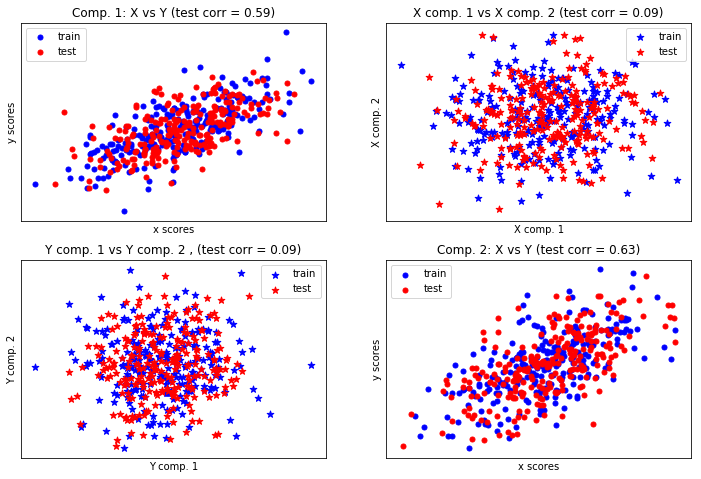

True B (such that: Y = XB + Err)
[[1 1 1]
 [2 2 2]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]]
Estimated B
[[ 1.   1.   1. ]
 [ 2.   2.   2. ]
 [-0.   0.   0. ]
 [-0.1  0.  -0. ]
 [-0.   0.   0. ]
 [-0.  -0.  -0. ]
 [ 0.  -0.  -0. ]
 [ 0.   0.   0. ]
 [ 0.1  0.   0. ]
 [-0.1  0.  -0. ]]
Estimated betas
[[ 1. ]
 [ 2.1]
 [-0. ]
 [ 0.1]
 [ 0.1]
 [ 0. ]
 [ 0. ]
 [-0. ]
 [ 0. ]
 [-0. ]]


In [2]:
# #############################################################################
# Canonical (symmetric) PLS

# Transform data
# ~~~~~~~~~~~~~~
plsca = PLSCanonical(n_components=2)
plsca.fit(X_train, Y_train)
X_train_r, Y_train_r = plsca.transform(X_train, Y_train)
X_test_r, Y_test_r = plsca.transform(X_test, Y_test)

# Scatter plot of scores
# ~~~~~~~~~~~~~~~~~~~~~~
# 1) On diagonal plot X vs Y scores on each components
plt.figure(figsize=(12, 8))
plt.subplot(221)
plt.scatter(X_train_r[:, 0], Y_train_r[:, 0], label="train",
            marker="o", c="b", s=25)
plt.scatter(X_test_r[:, 0], Y_test_r[:, 0], label="test",
            marker="o", c="r", s=25)
plt.xlabel("x scores")
plt.ylabel("y scores")
plt.title('Comp. 1: X vs Y (test corr = %.2f)' %
          np.corrcoef(X_test_r[:, 0], Y_test_r[:, 0])[0, 1])
plt.xticks(())
plt.yticks(())
plt.legend(loc="best")

plt.subplot(224)
plt.scatter(X_train_r[:, 1], Y_train_r[:, 1], label="train",
            marker="o", c="b", s=25)
plt.scatter(X_test_r[:, 1], Y_test_r[:, 1], label="test",
            marker="o", c="r", s=25)
plt.xlabel("x scores")
plt.ylabel("y scores")
plt.title('Comp. 2: X vs Y (test corr = %.2f)' %
          np.corrcoef(X_test_r[:, 1], Y_test_r[:, 1])[0, 1])
plt.xticks(())
plt.yticks(())
plt.legend(loc="best")

# 2) Off diagonal plot components 1 vs 2 for X and Y
plt.subplot(222)
plt.scatter(X_train_r[:, 0], X_train_r[:, 1], label="train",
            marker="*", c="b", s=50)
plt.scatter(X_test_r[:, 0], X_test_r[:, 1], label="test",
            marker="*", c="r", s=50)
plt.xlabel("X comp. 1")
plt.ylabel("X comp. 2")
plt.title('X comp. 1 vs X comp. 2 (test corr = %.2f)'
          % np.corrcoef(X_test_r[:, 0], X_test_r[:, 1])[0, 1])
plt.legend(loc="best")
plt.xticks(())
plt.yticks(())

plt.subplot(223)
plt.scatter(Y_train_r[:, 0], Y_train_r[:, 1], label="train",
            marker="*", c="b", s=50)
plt.scatter(Y_test_r[:, 0], Y_test_r[:, 1], label="test",
            marker="*", c="r", s=50)
plt.xlabel("Y comp. 1")
plt.ylabel("Y comp. 2")
plt.title('Y comp. 1 vs Y comp. 2 , (test corr = %.2f)'
          % np.corrcoef(Y_test_r[:, 0], Y_test_r[:, 1])[0, 1])
plt.legend(loc="best")
plt.xticks(())
plt.yticks(())
plt.show()

# #############################################################################
# PLS regression, with multivariate response, a.k.a. PLS2

n = 1000
q = 3
p = 10
X = np.random.normal(size=n * p).reshape((n, p))
B = np.array([[1, 2] + [0] * (p - 2)] * q).T
# each Yj = 1*X1 + 2*X2 + noize
Y = np.dot(X, B) + np.random.normal(size=n * q).reshape((n, q)) + 5

pls2 = PLSRegression(n_components=3)
pls2.fit(X, Y)
print("True B (such that: Y = XB + Err)")
print(B)
# compare pls2.coef_ with B
print("Estimated B")
print(np.round(pls2.coef_, 1))
pls2.predict(X)

# PLS regression, with univariate response, a.k.a. PLS1

n = 1000
p = 10
X = np.random.normal(size=n * p).reshape((n, p))
y = X[:, 0] + 2 * X[:, 1] + np.random.normal(size=n * 1) + 5
pls1 = PLSRegression(n_components=3)
pls1.fit(X, y)
# note that the number of components exceeds 1 (the dimension of y)
print("Estimated betas")
print(np.round(pls1.coef_, 1))

# #############################################################################
# CCA (PLS mode B with symmetric deflation)

cca = CCA(n_components=2)
cca.fit(X_train, Y_train)
X_train_r, Y_train_r = cca.transform(X_train, Y_train)
X_test_r, Y_test_r = cca.transform(X_test, Y_test)

In [6]:
np.random.normal(size=4 * n).reshape((n, 4)).shape

(1000, 4)